# 1. EDB Score 

In `data/DBData.csv`, you have the full "ease of doing business" dataset from the World Bank. Reformat it into the **Tidy Data** format, so one row is per-year-per-country

Result should look like:

![](EDB_unstack.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dbd = pd.read_csv('data/DBData.csv')
dbd = dbd.drop(['Country Code', 'Indicator Code', 'Unnamed: 20'],1)

In [3]:
dbd = pd.DataFrame(dbd.pivot(index='Indicator Name', columns='Country Name'))

In [4]:
temp = dbd.T
temp.reset_index(inplace=True)
temp.rename(columns={'level_0':'Year','Country Name':'Country'},inplace=True)
temp.index.name='Measure'

In [5]:
temp

Indicator Name,Year,Country,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),...,Trading across borders: Documents to export (number) (DB06-15 methodology),Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score
Measure,,,,,,,,,,,,,,,,,,,,,
0,2004,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,2019,Vietnam,NaN,79.05,12.0,80.00,0.7,96.54,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,66.04,71.01,NaN,80.29,68.62
3388,2019,West Bank and Gaza,NaN,56.15,12.0,80.00,14.4,28.24,0.0,20.0,...,NaN,NaN,NaN,NaN,NaN,96.86,57.99,NaN,98.21,81.45
3389,2019,"Yemen, Rep.",NaN,0.00,NaN,0.00,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00


# 2 GDP and ease of doing business

Using the additional data in `data/GDPpc.csv`, join the clean dataset in **1** to the GDP data.

**What are the 3 Ease of Doing Business variables most closely linked to GDP?**

Answer by giving their correlation ratio, and give a possible explanation and a data visualization

**hint:** trying to do `df.corr()` or `sns.pairplot()` on the whole dataset will crash most computers. Be smart about the number of columns you're testing at once.

In [6]:
gdp = pd.read_csv('data/GDPpc.csv')
gdp = gdp.drop(['Country Code', 'Indicator Code'],1)

In [7]:
gdp = pd.DataFrame(gdp.pivot(index='Indicator Name', columns='Country Name'))

In [8]:
temp2 = gdp.T
temp2.reset_index(inplace=True)
temp2.rename(columns={'level_0':'Year','Country Name':'Country'},inplace=True)
temp2.index.name='Measure'

In [9]:
temp2

Indicator Name,Year,Country,GDP per capita (current US$)
Measure,,,
0,1960,Afghanistan,59.777327
1,1960,Albania,NaN
2,1960,Algeria,244.824806
3,1960,American Samoa,NaN
4,1960,Andorra,NaN
...,...,...,...
15571,2018,West Bank and Gaza,NaN
15572,2018,World,NaN
15573,2018,"Yemen, Rep.",NaN


In [10]:
new_df = temp.merge(temp2, how='inner',on=['Year','Country'])

In [11]:
list(new_df)[-1] # merge successful

'GDP per capita (current US$)'

In [12]:
correlation = new_df.corr()
correlation['GDP per capita (current US$)'].isna().sum()

11

In [13]:
correlation['GDP per capita (current US$)'] = correlation['GDP per capita (current US$)'].dropna()

In [14]:
correlation['GDP per capita (current US$)'].sort_values(ascending=False).nlargest(4)

Indicator Name
GDP per capita (current US$)                                                                                    1.000000
Getting electricity: Total duration and frequency of outages per customer a year (0-3) (DB16-19 methodology)    0.646972
Resolving insolvency (DB04-14 methodology) - Score                                                              0.644669
Resolving insolvency: Recovery rate (cents on the dollar)                                                       0.644232
Name: GDP per capita (current US$), dtype: float64

In [15]:
# What are the 3 Ease of Doing Business variables most closely linked to GDP?
    # Getting electricity: Total duration and frequency of outages per customer a year (0-3) (DB16-19 methodology)    0.646972
    # Resolving insolvency (DB04-14 methodology) - Score                                                              0.644669
    # Resolving insolvency: Recovery rate (cents on the dollar)                                                       0.644232

In [16]:
import seaborn as sns

C:\Users\gayar\anaconda3\lib\site-packages\seaborn\axisgrid.py:1342: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)


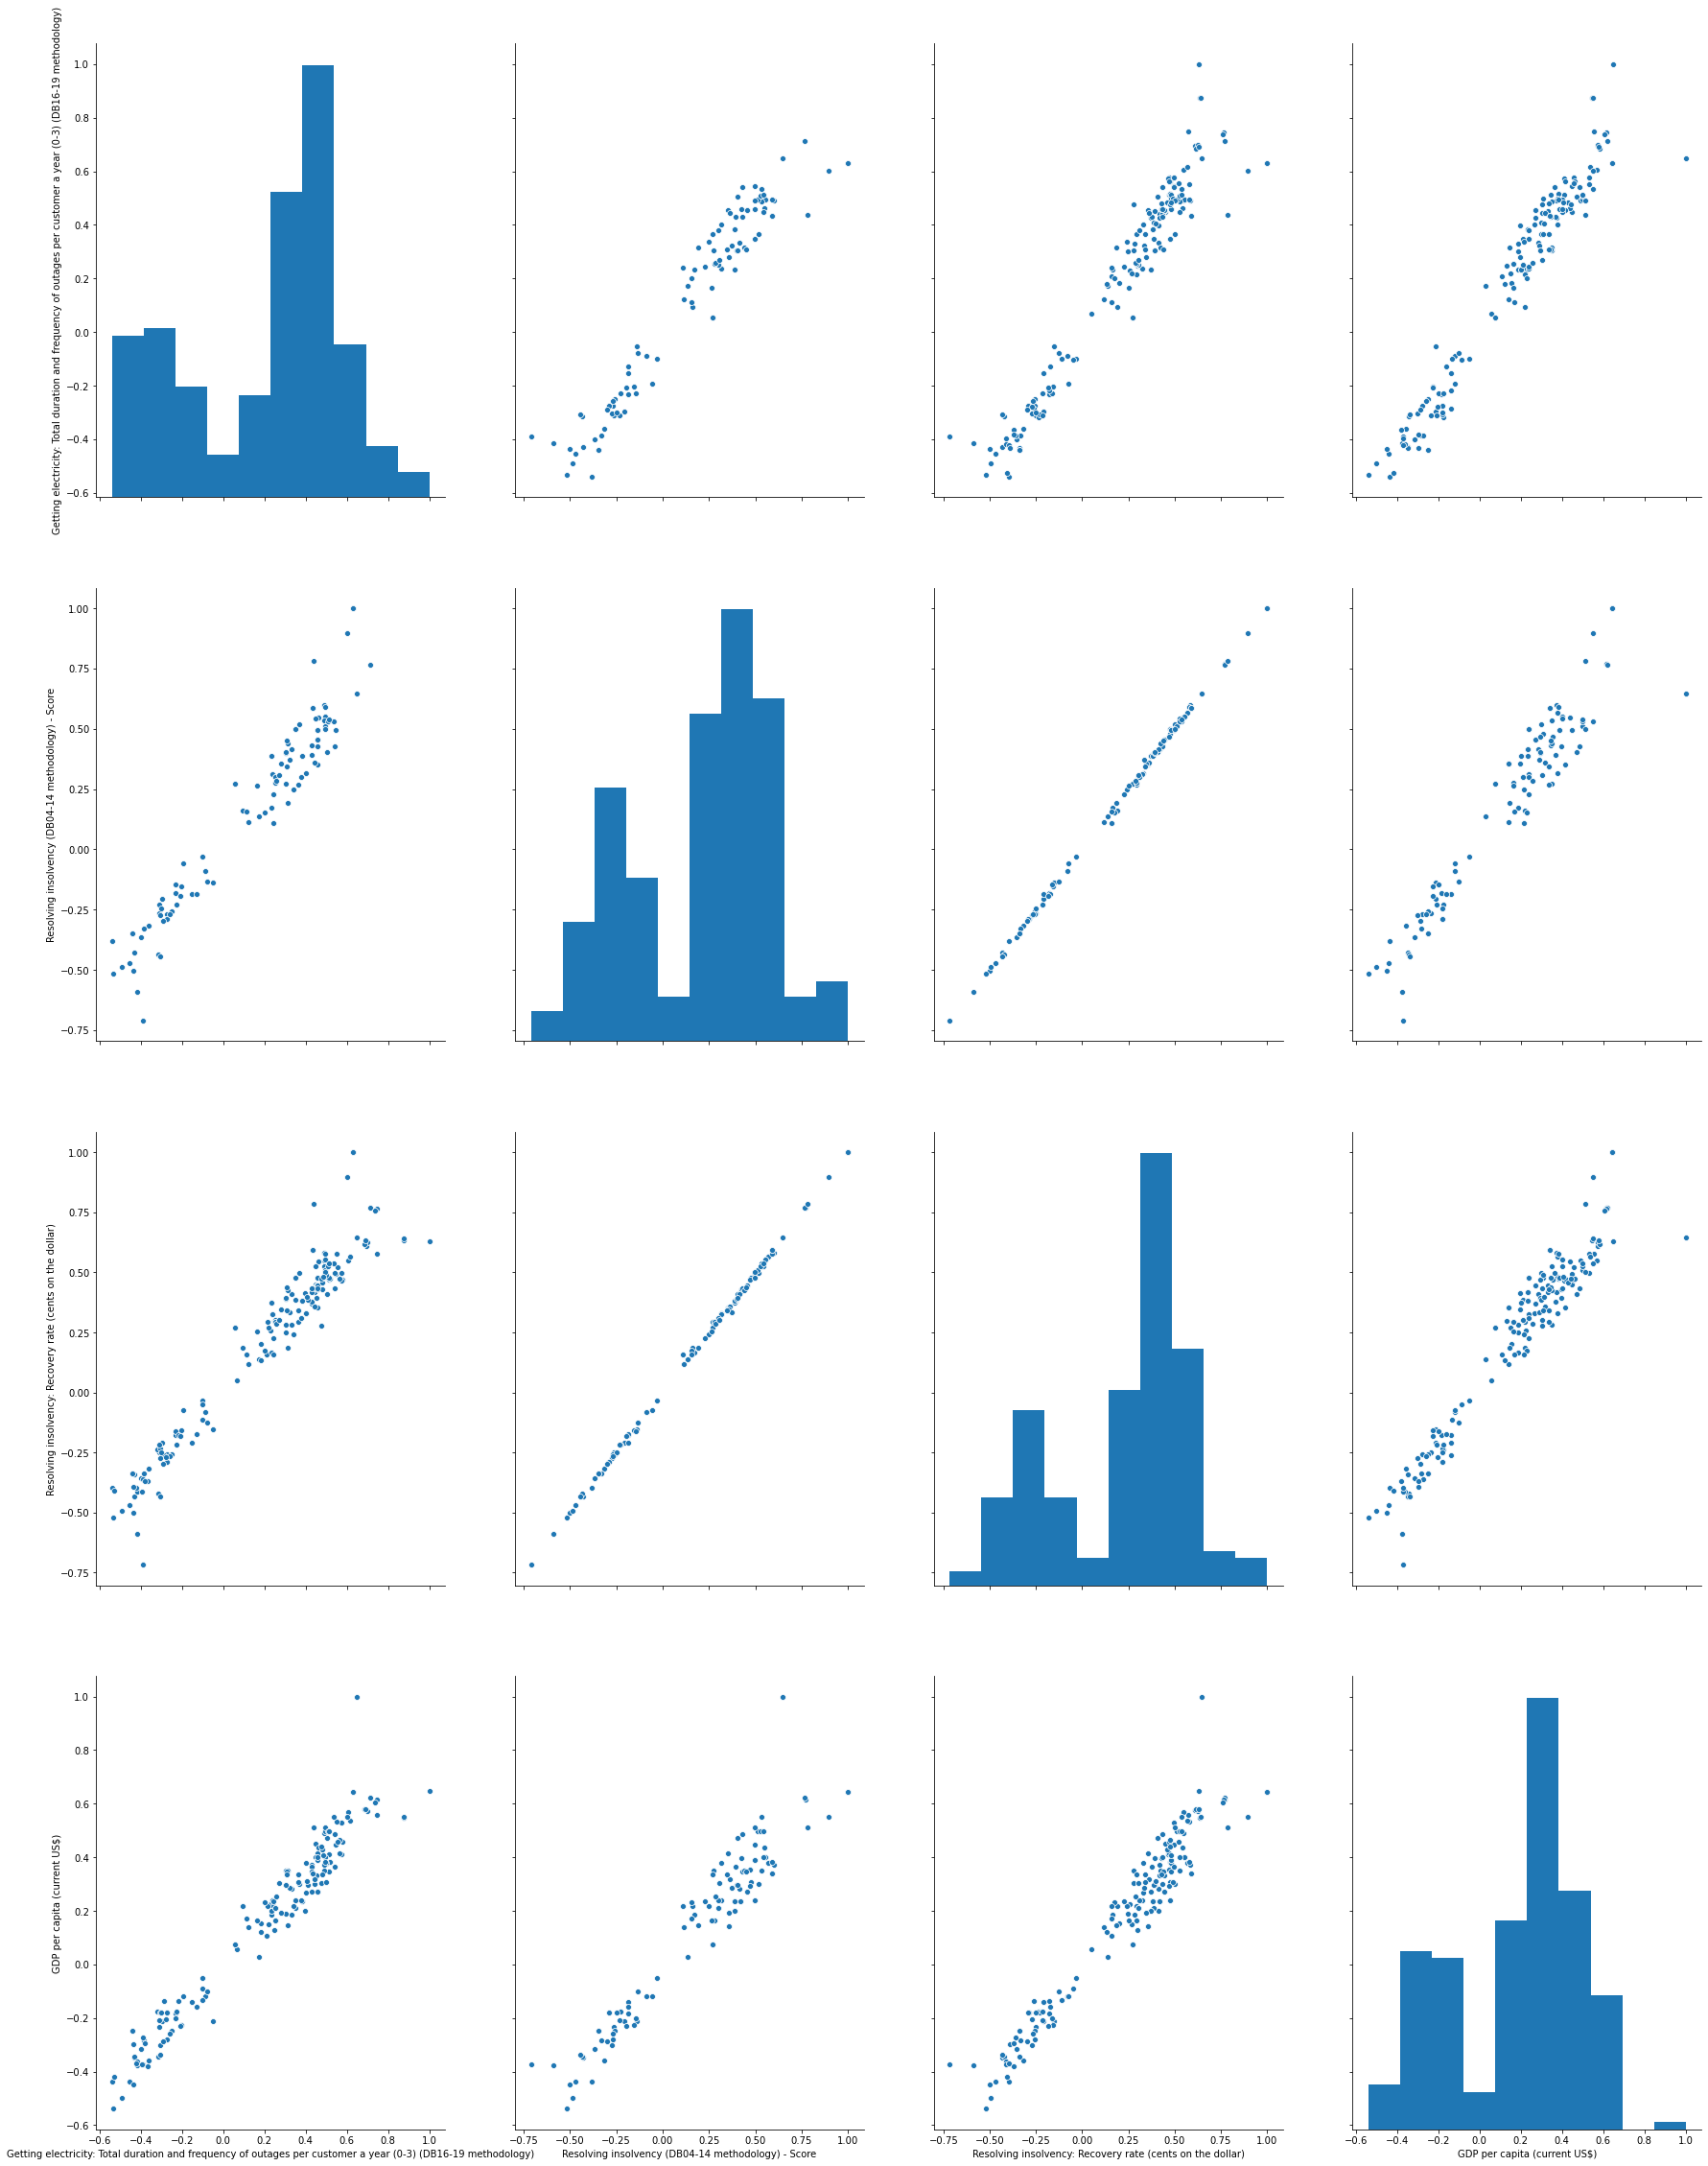

In [17]:
res=(correlation[['Getting electricity: Total duration and frequency of outages per customer a year (0-3) (DB16-19 methodology)',
             'Resolving insolvency (DB04-14 methodology) - Score',
             'Resolving insolvency: Recovery rate (cents on the dollar)',
             'GDP per capita (current US$)']]
    )
res

# sns.pairplot(res)
sns.pairplot(res).fig.set_size_inches(30,40)

# 3. Chocolate Nobel question

In this repository is the academic paper `chocolate_nobel.pdf`. 

Explain in 3 paragraphs why this paper's conclusions are bad statistics.

The conclusions presented in this paper are bad statistics for a number of reasons:

First, the study cannot be reproduced. Second, the sample size for each dataset, count of Nobel Laureates and Chocolate Consumption are too different. One has data from the 1900s where as the other, the earliest it goes back is 2002 and this too, not for all countries! Finally, (even if the author does mention this briefly) while these datasets may be correlated, one cannot assume that one is the cause of another ("correlation is not causation!").

The study relies heavily on a series of assumptions and inferences that are not tested or measured specifically. The author relies on data that cannot effectively measure cognitive function. This is done by way of a bias where it presumes that Nobel Laureats are necessarily members of society that have a greater cognitive function - at all times. It does not consider the decay of cognitive function over time. It also fails to recognize the plethora of factors that influence cognitive function in a person and the pack of factors that can influence a persons access to chocolate. Also, there is no evidence to indicate that the Nobel Laureates consumed chocolate. It also does not consider the quality or grade of the chocolate - where chocolates may contain varying degrees of flavonol content. By large, its greatest fault is that it dismisses inherent biases in the datasets, very casually. For example, the author deems Sweden an outlier because it is home to the Nobel Committee. Disregarding the co-influence of so many more factors is irresponsible reporting.